In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from funcs import *

In [87]:
#Number of infected for past two weeks
X = pd.read_csv('data.csv').iloc[:,1:-2].values

#Number of recovered
y_recovered = pd.read_csv('data.csv').iloc[:,-1].values

#Number of deaths
y_deaths = pd.read_csv('data.csv').iloc[:,-2].values

pct_90 = int(np.ceil(90*len(X)/100))
pct_80 = int(np.ceil(80*len(X)/100))
pct_70 = int(np.ceil(70*len(X)/100))
pct_50 = int(np.ceil(50*len(X)/100))
pct_40 = int(np.ceil(40*len(X)/100))



In [88]:
y_deaths = y_deaths[:-1]
X = X[:-1,:]


In [89]:
y_deaths

array([ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,
        1.000e+00,  0.000e+00,  2.000e+00,  3.000e+00,  2.000e+00,
        8.000e+00,  0.000e+00,  1.400e+01,  1.500e+01,  0.000e+00,
        3.100e+01,  1.200e+01,  0.000e+00,  5.800e+01,  0.000e+00,
        0.000e+00,  9.500e+01,  2.070e+02,  1.120e+02,  1.130e+02,
        1.860e+02,  2.400e+02,  2.310e+02,  3.650e+02,  2.990e+02,
        3.200e+02,  2.940e+02,  4.190e+02,  5.020e+02,  8.820e+02,
        9.840e+02,  1.122e+03,  1.054e+03,  5.190e+02,  8.330e+02,
        1.417e+03,  5.440e+02,  1.341e+03,  9.870e+02,  6.360e+02,
        5.610e+02,  5.740e+02,  7.450e+02,  1.438e+03,  7.530e+02,
        7.610e+02,  6.420e+02,  3.950e+02,  5.470e+02,  5.310e+02,
        5.440e+02,  5.160e+02,  3.900e+02,  3.690e+02,  2.420e+02,
        4.370e+02,  3.670e+02,  4.270e+02,  2.890e+02,  2.180e+02,
        1.660e+02,  1.370e+02,  3.040e+02,  3.330e+02,  2.750e+02,
        1.780e+02,  2.430e+02,  8.000e+01,  7.000e+01,  2.630e

In [90]:
pct = pct_80

X_train, X_test = X[:pct], X[pct:]
y_train, y_test =y_deaths[:pct], y_deaths[pct:]

In [91]:
y_test

array([ 348.,   83.,  351.,  104.,  290.,  290.,  131., -217.,  110.,
         83.,   74.,   43.,   35.,   90.,   73.,   66.,   66.])

# Smoothing

In [92]:
find_best_K(X, y_deaths, 'even', model='baseline')

(0, 0.4788031739729356)

In [93]:
find_best_K(X, y_deaths, 'odd', model='baseline')

(0, 0.4788031739729356)

In [94]:
X = apply_smoothing(X, 0, 'odd')

In [95]:
k = find_optimum_k(X_train, X_test, y_train, y_test)[3][0]
k

3

In [96]:
y_pred = baseline_model_k(X_train, X_test, y_train, y_test, k)[1]

In [97]:
# best: 5, 7, 
mape(y_test, y_pred)

0.879566528821229

In [98]:
y_test

array([ 348.,   83.,  351.,  104.,  290.,  290.,  131., -217.,  110.,
         83.,   74.,   43.,   35.,   90.,   73.,   66.,   66.])

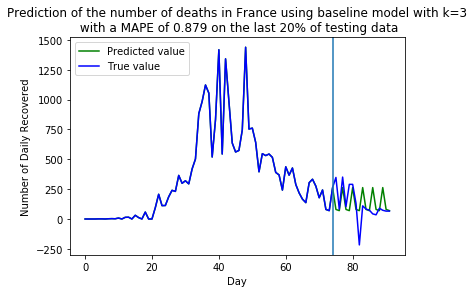

In [99]:
plot_baseline(X_train, X_test, y_train, y_test, y_deaths, k, pct, 'France')